In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

data = pd.read_csv('metrics.csv')

data['Date'] = pd.to_datetime(data['Unnamed: 0'])
data.set_index('Date', inplace=True)
data = data.drop('Unnamed: 0', axis=1)

# To Monthly Data
data_m = data.resample('M').mean()

metrics = data_m[['Preço Realizado', 'Preço de NVT', 'Custos Evitados', 'Custo de Produção', 'Preço de Metcalfe', 'Preço de Estoque-Fluxo']]
# Transformar listas em dataframe
# Correlação da metrica com preço
#print(list(data))
# BOX PLOT com as razoes da metrica

<function matplotlib.pyplot.show(*args, **kw)>

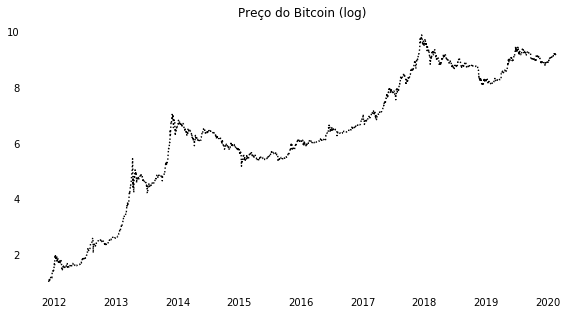

In [3]:
## Plot BTC Price Alone

fig, ax = plt.subplots(figsize=(10, 5))
#fig.patch.set_facecolor((.973, .975, .992))
# Dates
x = data.index
# Line 1
y1 = np.log(data['Preço'])
# Price
ax.plot(x, y1, color='black', linewidth=1.4, ls=':')
    
ax.set_title('Preço do Bitcoin (log)')
ax.grid(True, color='black', linestyle='-.', linewidth=.3, alpha=0)
ax.tick_params(axis='both', which='both', length=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


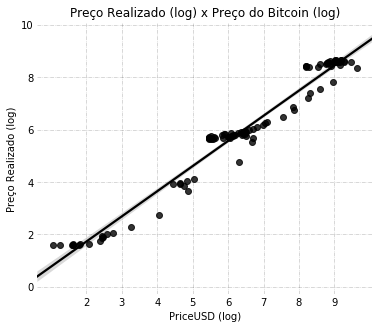

<Figure size 432x288 with 0 Axes>

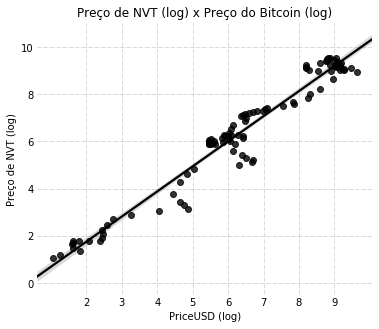

<Figure size 432x288 with 0 Axes>

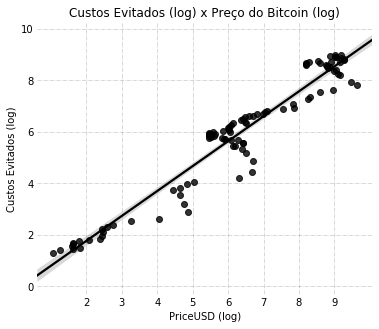

<Figure size 432x288 with 0 Axes>

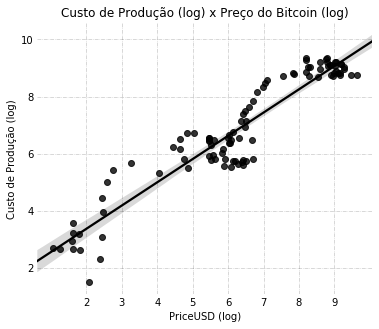

<Figure size 432x288 with 0 Axes>

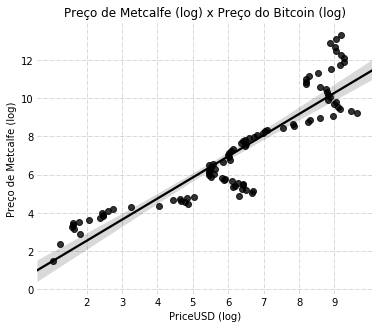

<Figure size 432x288 with 0 Axes>

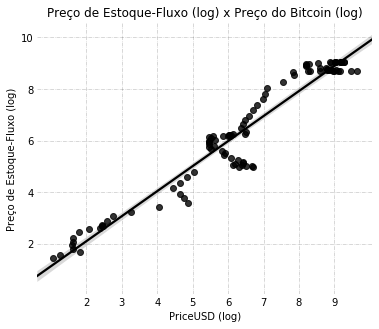

<Figure size 432x288 with 0 Axes>

In [4]:
# Log-log scatter plot -- All x PriceUSD
for col in metrics:
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.log(data_m['Preço'])
    y = np.log(data_m[col])
    
    #fig.patch.set_facecolor((.973, .975, .992))
    #ax.set_facecolor((.973, .975, .992))
    
    ax.set_title('{} (log)'.format(col)+' x Preço do Bitcoin (log)')
    ax.grid(True, color='black', linestyle='-.', linewidth=.6, alpha=.25)
    ax = sns.regplot(x="Preço", y=col, data=np.log(data_m), color='black')
    ax.set_xlabel('PriceUSD (log)')
    ax.set_ylabel('{} (log)'.format(col))
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks(range(2, 10))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    plt.show()
    filename = 'SCATTER_{}.png'.format(col)
    plt.savefig(filename)
    plt.show()

In [ ]:
# Correlation between columns -- Heatmap
corr = abs(data_m.corr())
corr = corr.round(4)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, 0)

ax.set_title('Matriz de correlação')
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(corr, mask=mask, square=True, annot=True, annot_kws={"size": 16}, cmap='binary', linewidths=.5, cbar=False)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('HEATMAP_CORR.png')
plt.show()

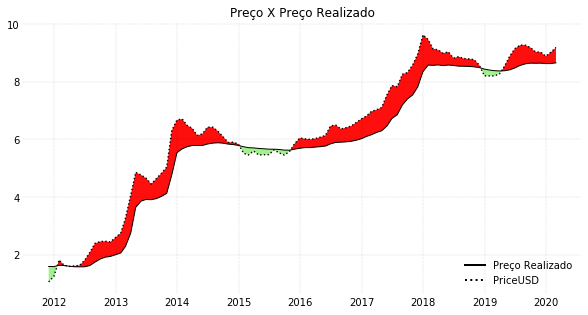

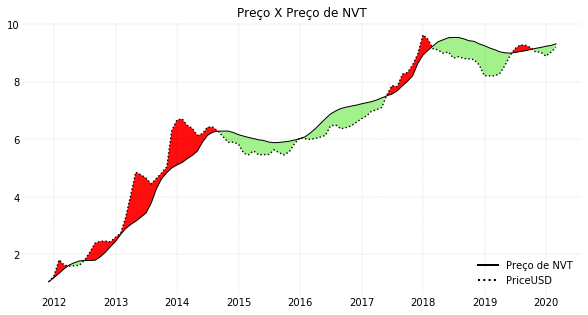

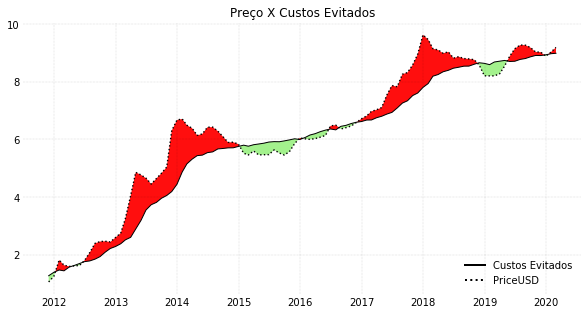

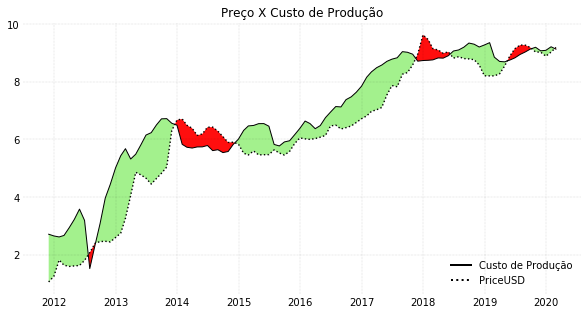

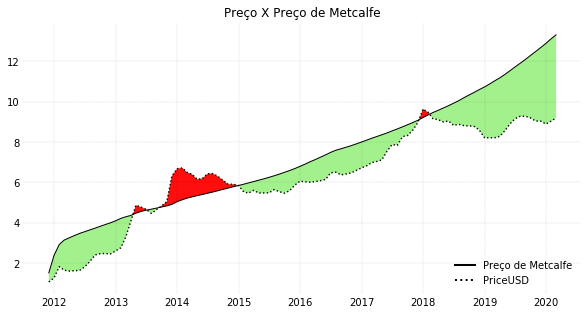

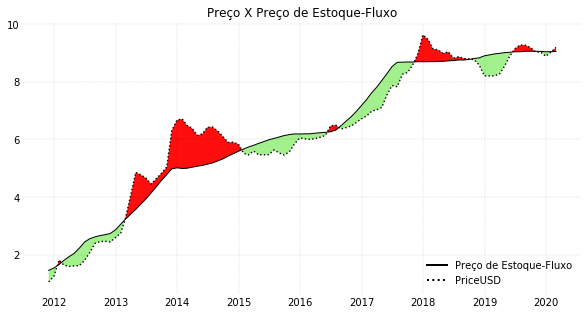

In [2]:
# Plot the difference between log-log -- All x PriceUSD
for col in metrics:
    fig, ax = plt.subplots(figsize=(10, 5))
    #fig.patch.set_facecolor((.973, .975, .992))
    # Dates
    x = data_m.index
    # Line 1
    y1 = np.log(data_m['Preço'])
    # Line 2
    y2 = np.log(data_m[col])
    # Plot
    #ax.set_facecolor((.973, .975, .992))
    
    # Price
    ax.plot(x, y1, color='black', linewidth=1.4, ls=':')
    # Other
    ax.plot(x, y2, color='black', linewidth=1)
    ax.fill_between(x, y1, y2, where=(y1 < y2), facecolor=(.641, .945, .551), interpolate=True)
    ax.fill_between(x, y1, y2, where=(y1 > y2), facecolor=(1, .055, .055), interpolate=True)
    
    ax.set_title('Preço X {}'.format(col))
    ax.grid(True, color='black', linestyle='-.', linewidth=.3, alpha=.25)
    ax.tick_params(axis='both', which='both', length=0)
#     ax.set_xticks([])
    
    legend_elements = [Line2D([0], [0], color='black', lw=2, label='{}'.format(col)), Line2D([0], [0], color='black', lw=2, ls=':', label='PriceUSD')] 
    ax.legend(handles=legend_elements, loc='lower right', framealpha=0)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    filename = 'AREA_{}.png'.format(col)
    plt.savefig(filename)
    plt.show()

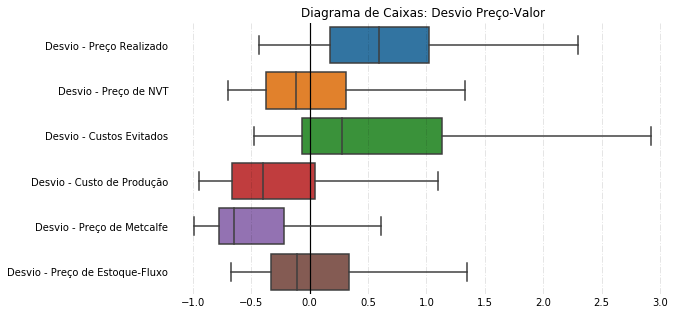

In [5]:
metrics_dev = []
for i in metrics:
    data['Desvio - '+i] = (data['Preço'] / data[i]) - 1
    metrics_dev.append('Desvio - '+i)

fig, ax = plt.subplots(figsize=(9, 5))

ax.set_title('Diagrama de Caixas: Desvio Preço-Valor')
ax.grid(True, color='black', linestyle='-.', linewidth=1, alpha=.1)
ax = sns.boxplot(x="value", y="variable", data=pd.melt(data[metrics_dev]), showfliers=False)#, whis = 0.5)
ax.vlines(0, -.5, 5.5, lw=1.2)#, ls='--')
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_xticklabels(data_m[metrics_rat].columns, rotation=45)
ax.tick_params(axis='both', which='both', length=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('BOXPLOT_DEV.png')
plt.show()

In [3]:
data

,Preço,Preço Realizado,Preço de NVT,Custos Evitados,Custo de Produção,Preço de Metcalfe,Preço de Estoque-Fluxo
Date,,,,,,,
2011-11-29,2.757698,4.889777,2.804398,3.540148,15.0,4.494576,4.262909
2011-11-30,2.966042,4.905103,2.871033,3.563358,15.0,4.494576,4.295272
2011-12-01,3.082589,4.910057,2.977191,3.589234,14.0,4.494576,4.325451
2011-12-02,3.100402,4.909299,3.026364,3.625762,14.0,4.494576,4.360648
2011-12-03,2.803856,4.885003,3.038516,3.666433,14.0,4.494576,4.395022
2011-12-04,2.819694,4.883833,3.049797,3.713462,12.0,4.494576,4.428454
2011-12-05,2.874796,4.880742,3.097475,3.758743,12.0,4.494576,4.440331
2011-12-06,3.025360,4.886569,3.143139,3.785328,12.0,4.494576,4.457077
2011-12-07,2.985502,4.856501,3.191899,3.805547,15.0,4.494576,4.477909
